<a href="https://colab.research.google.com/github/kmkarakaya/Deep-Learning-Tutorials/blob/master/Multi_Class_Text_Classification_End_to_End_Example_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-Class Text Classification with a GPT3 Transformer block: An End-to-End Example


**Author:** [Murat Karakaya & Cansen Çağlayan](https://www.linkedin.com/in/muratkarakaya/)<br>
**Date created:** 05 Oct 2021<br>
**Last modified:** 19 Oct 2021<br>
**Description:** This tutorial has 2 parts as explained below.

**Accessible on:**
* YouTube in English:

[Part A](https://youtu.be/ZhSYKfmPuM8)

[Part B](https://youtu.be/KnSeSdXMX_Q)

[Controllable Text Generation with Transformer Structure (GPT3) playlist](https://www.youtube.com/playlist?list=PLQflnv_s49v8Eo2idw9Ju5Qq3JTEF-OFW)

[Classification with Keras / Tensorflow playlist](https://www.youtube.com/playlist?list=PLQflnv_s49v-RGv6jb_sFOb_of9VOEpKG)


* [Medium](https://medium.com/deep-learning-with-keras/controllable-text-generation-in-deep-learning-with-transformers-gpt3-using-tensorflow-keras-3d9e6bbe243b)
* [Github pages](https://kmkarakaya.github.io/Deep-Learning-Tutorials/)
* [Github Repo](https://github.com/kmkarakaya/Deep-Learning-Tutorials)
* [Google Colab](https://colab.research.google.com/drive/1BHL_jaEVuTy6cfYBk8n-8iYvSeJICo12?usp=sharing)



**Part A: Data Analysis & Text Preprocessing**

Changes made according to the suggestions after the Research Meeting.

All preprocess operations to be applied to text data are included in the custom_standardization function. Thus, the text vectorization layer will use these operations as standardized and apply it to every given text data.

The changes that have been made :

1.   The process of removing numbers from text data is included in the custom_standardization function.
2.   The process of removing punctuation from text data is included in the custom_standardization function.
3.   Removing **"Devamını oku (Read more)"** from text data is included in the custom_standardization function.
4.   Changing the Turkish characters (ç,ğ,ı,ö,ş,ü) in the text data as (c,g,i,o,s,u) has been added to the custom_standardization function.
5.   Added **encoding='utf-8'** to lowercase function.

You can **watch** the Part A [on the Murat Karakaya Akademi YouTube channel](https://youtu.be/ZhSYKfmPuM8).



**Part B: Text Classiffication**

**Multi-Class Classification Metrics**

*   confusion_matrix :  Compute confusion matrix to evaluate the accuracy of a classification.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

*   balanced_accuracy_score : The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score

*   matthews_corrcoef : The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef

*   f1_score :  The F1 score can be interpreted as a weighted average of the precision and recall

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html?highlight=f1#sklearn.metrics.f1_score


You can **watch** the Part B [on the Murat Karakaya Akademi YouTube channel](https://youtu.be/KnSeSdXMX_Q).







# References

You can ***watch*** all the tutorials on the  **Murat Karakaya Akademi YouTube channel**:

[Controllable Text Generation with Transformer Structure (GPT3) playlist](https://www.youtube.com/playlist?list=PLQflnv_s49v8Eo2idw9Ju5Qq3JTEF-OFW)

[Classification with Keras / Tensorflow playlist](https://www.youtube.com/playlist?list=PLQflnv_s49v-RGv6jb_sFOb_of9VOEpKG)

<br>


https://stackoverflow.com/questions/62591306/applying-k-fold-validation-for-text-classification

https://stackoverflow.com/questions/65103526/how-to-save-textvectorization-to-disk-in-tensorflow

https://www.kaggle.com/selener/multi-class-text-classification-tfidf#Text-classification-(multiclass)

https://scikit-learn.org/stable/modules/model_evaluation.html

https://keras.io/examples/nlp/text_classification_with_transformer/

https://www.youtube.com/watch?v=F--_SOlufpE&t=28s

https://www.kaggle.com/selener/multi-class-text-classification-tfidf

https://www.kaggle.com/darkcore/multi-class-text-classification-with-cnn

# Import Libraries

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import re
import string
import random
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_squared_error

In [ ]:
#@title Record Each Cell's Execution Time
!pip install ipython-autotime

%load_ext autotime

time: 660 µs (started: 2021-10-18 20:23:41 +00:00)


# Download Kaggle Dataset into Google Colab

[The Kaggle Dataset is here.](https://www.kaggle.com/savasy/multiclass-classification-data-for-turkish-tc32?select=ticaret-yorum.csv)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
time: 7.19 ms (started: 2021-10-18 20:23:41 +00:00)


In [ ]:
!ls

gdrive	sample_data
time: 135 ms (started: 2021-10-18 20:23:41 +00:00)


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

time: 3.24 ms (started: 2021-10-18 20:23:41 +00:00)


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle
time: 11 ms (started: 2021-10-18 20:23:41 +00:00)


In [ ]:
#Check the present working directory using pwd command
!pwd

/content/gdrive/My Drive/Kaggle
time: 121 ms (started: 2021-10-18 20:23:41 +00:00)


In [ ]:
#!kaggle datasets download -d savasy/multiclass-classification-data-for-turkish-tc32

time: 1.81 ms (started: 2021-10-18 20:23:41 +00:00)


In [ ]:
# check the downloaded zip file
!ls 

kaggle.json  ticaret-yorum.csv
time: 137 ms (started: 2021-10-18 20:23:41 +00:00)


In [ ]:
# unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip

time: 982 µs (started: 2021-10-18 20:23:41 +00:00)


In [ ]:
# check the downloaded csv file
!ls 

kaggle.json  ticaret-yorum.csv
time: 122 ms (started: 2021-10-18 20:23:41 +00:00)


In [ ]:
data = pd.read_csv('ticaret-yorum.csv')
pd.set_option('max_colwidth', 400)

time: 7.33 s (started: 2021-10-18 20:23:42 +00:00)


# Explore the Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431306 entries, 0 to 431305
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  431306 non-null  object
 1   text      431306 non-null  object
dtypes: object(2)
memory usage: 6.6+ MB
time: 170 ms (started: 2021-10-18 20:22:13 +00:00)


In [ ]:
data.head(5)

,category,text
0,alisveris,"Altus Hırdavat Yapı Malzemeleri Drone Diye Kargodan Lastik Ayakkabı Çıktı,""Instagram'da dolanırken sponsorlu bir bağlantı gördüm. Drone satışı yapılıyor. Normalde böyle şeylere inanmam ancak takipçi sayısının fazla olması, numaralarının olması, ödemeyi peşin değil karşı ödemeli ödenmesi, fotoğraflara yapılan yorumlar vs... Az da olsa güvenerek ben de sipariş vermek istedim...Devamını oku"""
1,alisveris,"Albay Bilgisayar Garanti Yalanı İle Yanılttı,Garanti kapsamında yer alan Casper bilgisayarım garanti belgesi ile birlikte İzmit Casper bilgisayar yetkili servisine albay bilgisayara bıraktım. Önce almak istemedi uzun ikna cabası ve uğraş sonunda zorla garanti dahiline bıraktım bilgisayar açılmıyordu. Sonrasında ertesi gün bilgisayarın yapıldı...Devamını oku"
2,alisveris,"Okyanus Petshop Ürün İade Sorunu!,Satıcıdan GittiGidiyor üzerinden 385 TL tutarında Frolicat Interactive Kedi Lazer oyuncağı satın aldım. Ürünü açıp bir kez çalıştırdığımda çok gürültü çıkardığını fark ettim ve ürünü iade etmeye karar verdim. Hatam iade sürecinin 14 gün içinde olması gerektiğini bilmemekti. Ürünü teslim aldıktan son...Devamını oku"
3,alisveris,"Anda İhtiyaç Ve Tüketim Maddeleri Knee Tork Dizlik Esnemiyor!,Anda ihtiyaç ve tüketim maddeleri pazarlama san. Lim. Şti. Den 139 TL kapıda teslim knee tork adlı ürünü satın aldım. Ürün 0815774588452 takip no... İle Aras Kargo tarafından tarafıma teslim edildi. Ürün kargoya firma tarafından 26.05.2020 tarihinde kargoya verilmiş. Ürünün üst dizlik bedeni bacağım...Devamını oku"
4,alisveris,"BB Kargo Dağıtım'dan Aldığım Ürün Bozuk Çıktı Ve Muhatap Bulamıyorum!,Fotoğrafını göndermiş olduğum ürünün kablosunda temassızlık var ve ne fatura ne numara sadece gönderen kargonun adı var ve onlara da ulaşamıyorum ayrıca kargo daha bugün elime geçti Denizli Marmaris gezmiş ürün. Beni arayan numarayı buldum ona da ulaşılamıyor.Devamını oku"


time: 90.4 ms (started: 2021-10-18 20:22:16 +00:00)


In [ ]:
data.describe()

,category,text
count,431306,431306
unique,32,427231
top,kamu-hizmetleri,"Ferhunde Hanım Kına Konağı Yerimi Başkasına Verdiler,Kına için opsiyonladığım yeri başkasına verdiler normalde o günün boş olduğunu söylemişlerdi. Biliyordum da daha sonra orada sözleşme vardı. İptal edilmedi tarzı konuşup aptal yerine koydular. Mağdur etmekten başka bir şey değil. Oraya güvenip başka bir yerle anlaşmamıştım. Birkaç gün öncesinde de d...Devamını oku"
freq,14009,154


time: 2.07 s (started: 2021-10-18 20:22:17 +00:00)


## Remove Duplications

In [ ]:
data.text.duplicated(keep="first").value_counts()

False    427231
True       4075
Name: text, dtype: int64

time: 1.2 s (started: 2021-10-18 20:23:49 +00:00)


In [ ]:
data.drop_duplicates(subset="text",keep="first",inplace=True,ignore_index=True)
data.describe()

,category,text
count,427231,427231
unique,32,427231
top,kamu-hizmetleri,"Tefal Titanium Tava Ve Tencerelerde Kanser İhtimali,""Henüz alalı bir yıl bile olmadan iki adet tava ve bir adet tenceremizin iç kaplamalarının neredeyse yarısı """"su toplamış deri"""" gibi büyük baloncuklar halinde şişti."
freq,13998,1


time: 2.56 s (started: 2021-10-18 20:23:50 +00:00)


# Data Analysis
  * The number of reviews of each category:

In [ ]:
data.category.value_counts()

kamu-hizmetleri              13998
cep-telefon-kategori         13975
enerji                       13968
finans                       13958
ulasim                       13943
medya                        13908
kargo-nakliyat               13877
mutfak-arac-gerec            13867
alisveris                    13816
mekan-ve-eglence             13807
elektronik                   13770
beyaz-esya                   13761
kucuk-ev-aletleri            13732
giyim                        13676
internet                     13657
icecek                       13564
saglik                       13559
sigortacilik                 13486
spor                         13448
mobilya-ev-tekstili          13434
otomotiv                     13377
turizm                       13317
egitim                       13264
gida                         13150
temizlik                     13111
mucevher-saat-gozluk         12964
bilgisayar                   12963
kisisel-bakim-ve-kozmetik    12657
anne-bebek          

time: 76.2 ms (started: 2021-10-18 20:22:23 +00:00)


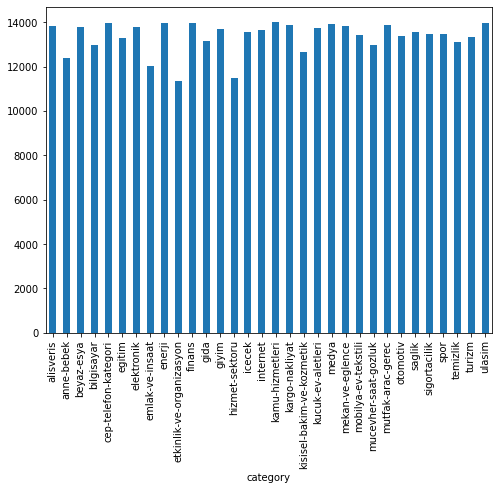

time: 1.01 s (started: 2021-10-18 20:22:23 +00:00)


In [ ]:
fig = plt.figure(figsize=(8,6))
data.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

* The number of words of each review:

In [ ]:
data['words'] = [len(x.split()) for x in data['text'].tolist()]

time: 4.03 s (started: 2021-10-18 20:22:24 +00:00)


In [ ]:
data.tail()

,category,text,words
427226,ulasim,"Pegasus Kabin Boyu Bagajım İçin 20 Euro Aldılar,Arkadaşlarımla Prag'dan İstanbul'a dönüş seferinde ilk defa Pegasus hava yollarını kullandım ve çok kötü bir havayolu. Pegasus'un kuralları gereği ekstra bagaj parası ödememek için valiziniz kabin içi valizi olmalı kuralına uyarak sürekli kabin içine aldığım 7.8 kg'lik valizimi aldım. Her uçağa sığ...Devamını oku",50
427227,ulasim,"Pegasus Sefer Saat Değişikliği,""05.02.2020 tarihinde Amsterdam'dan 16:25'de kalkması planlanan uçuşumuz, 3 kişinin ölümüyle sonuçlanan kaza sebebiyle pistin kapatılması sonucu 23:00'da kalkıp İstanbul Yeni Havalimanına saat 04:00'da iniş yapmıştır. Bu süre zarfında tarafımıza hiçbir bilgi verilmemiş, kabin bagajlarımızı uçaktan al...Devamını oku""",40
427228,ulasim,"THY Saygısız Müşteri Temsilcisi!,""THY'den bileti aldığım biletin isteğe bağlı iptal iade ve değişiklik yapılmasını istedim, AMA buna istinaden ödediğim paranın sadece sağlık siğortası olduğunu iddia ettiler.",26
427229,ulasim,"KLM Havayolları Bilgisizlikleri,Kraliyet firması imiş bizim Topkapı Sultançiftliği dolmuş hattı bile daha iyi hizmet veriyor biletim değişiyor ne T** nin haberi var ne de Klm ye ulaşabiliyorum. Aslında ulaştım ingilizce devam edelim diyen adama ben türkçe biliyorum dedim. Adam Türkçe için 10 dakika sonra arayın dedi. Ama çok bekle...Devamını oku",50
427230,ulasim,"Pegasus Çağrı Merkezi,""Pegasus internet sayfasından aldığım biletime evcil hayvanımı ekletmek için 0850 250 67 02, 0888 228 12 12 numaralı hatlarını en az 5 kere aradım her birinde ortalama 20 dk bekledim dakikası 1,5 TL den faturalandırıldığı bilgisi paylaşıyorlar. Ben böyle bir şey görmedim uçuşuma saatler kaldı ve ben ...Devamını oku""",51


time: 51.3 ms (started: 2021-10-18 20:22:28 +00:00)


In [ ]:
data['words'].describe()

count    427231.000000
mean         44.408624
std           8.108499
min           2.000000
25%          42.000000
50%          46.000000
75%          49.000000
max         183.000000
Name: words, dtype: float64

time: 42.7 ms (started: 2021-10-18 20:22:28 +00:00)


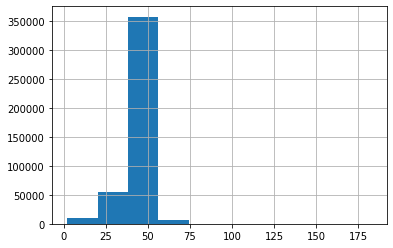

time: 9.02 s (started: 2021-10-18 20:22:28 +00:00)


In [ ]:
# Distribution of words in each review
data.text.str.split().\
    map(lambda x: len(x)).\
    hist()

* Longest Review

In [ ]:
print(max(data['text'], key=len))

İgdaş  Gecen Ay 313₺ Gelen Faturam
122813;enerji;Armagaz Kombi Çalışmadığı Halde 2 Aydır Faturalar Yüksek,20 gündür kombi çalışmadı buna rağmen faturam yüksek geliyor bu konuyla ilgilenmenizi istiyorum buradaki komşularımın hepsi düşük geliyor benim yüksek kombi bakımlarını yaptırmama rağmen bir şey değişmedi bu konuyla ilgili arkadaşların ilgilenmesini rica ediyorum. İsmet paşa Mahallesi albayrak sokak...Devamını oku
122814;enerji;İgdaş Fatura Tutarı Yüksek Gelmesi,500102988257 sözleşme hesap numaralı hattımda 18/05/2020 tarihli faturan havaların sıcak olduğundan doğalgazı kullanmadığım halde 44 okuma günü baza alınarak 328 TL gelmiş keza 4 ay faturamda aynı şekilde. Neye göre bu faturalandırmalar yapıldı? Faturaların ve sayacımın incelenmesi ödeme hesabımdan ...Devamını oku
122815;enerji;İgdaş Çok Fazla Fatura Geldi,Faturam 473 TL gelmiş. Kapalı olmasına rağmen böyle bir faturayı göndermek nedir ya? Günahtır. 5 katı fatura göndermek insanlık midir? Lütfen bir şey yapılsın. Ceza veril

* Shortest Review

In [ ]:
print(min(data['text'], key=len))

Gümüş İnşaat -,"Merhaba
time: 120 ms (started: 2021-10-18 20:22:37 +00:00)


# Adding Category Id

In [ ]:
data["text"]

0         Altus Hırdavat Yapı Malzemeleri Drone Diye Kargodan Lastik Ayakkabı Çıktı,"Instagram'da dolanırken sponsorlu bir bağlantı gördüm. Drone satışı yapılıyor. Normalde böyle şeylere inanmam ancak takipçi sayısının fazla olması, numaralarının olması, ödemeyi peşin değil karşı ödemeli ödenmesi, fotoğraflara yapılan yorumlar vs... Az da olsa güvenerek ben de sipariş vermek istedim...Devamını oku"
1                                        Albay Bilgisayar Garanti Yalanı İle Yanılttı,Garanti kapsamında yer alan  Casper bilgisayarım garanti belgesi ile birlikte İzmit Casper bilgisayar yetkili servisine albay bilgisayara bıraktım. Önce almak istemedi uzun ikna cabası ve uğraş sonunda zorla garanti dahiline bıraktım bilgisayar açılmıyordu. Sonrasında ertesi gün bilgisayarın yapıldı...Devamını oku
2                                                   Okyanus Petshop Ürün İade Sorunu!,Satıcıdan GittiGidiyor üzerinden 385 TL tutarında Frolicat Interactive Kedi Lazer oyuncağı satın aldım. Ürünü 

time: 7.04 ms (started: 2021-10-18 20:23:53 +00:00)


In [ ]:
data["category"]

0         alisveris
1         alisveris
2         alisveris
3         alisveris
4         alisveris
            ...    
427226       ulasim
427227       ulasim
427228       ulasim
427229       ulasim
427230       ulasim
Name: category, Length: 427231, dtype: object

time: 8.98 ms (started: 2021-10-18 20:23:53 +00:00)


In [ ]:
data["category"] = data["category"].astype('category') #By converting an existing Series or column to a category dtype
data.dtypes

category    category
text          object
dtype: object

time: 61.4 ms (started: 2021-10-18 20:23:53 +00:00)


In [ ]:
data["category_id"] = data["category"].cat.codes
data.tail()

,category,text,category_id
427226,ulasim,"Pegasus Kabin Boyu Bagajım İçin 20 Euro Aldılar,Arkadaşlarımla Prag'dan İstanbul'a dönüş seferinde ilk defa Pegasus hava yollarını kullandım ve çok kötü bir havayolu. Pegasus'un kuralları gereği ekstra bagaj parası ödememek için valiziniz kabin içi valizi olmalı kuralına uyarak sürekli kabin içine aldığım 7.8 kg'lik valizimi aldım. Her uçağa sığ...Devamını oku",31
427227,ulasim,"Pegasus Sefer Saat Değişikliği,""05.02.2020 tarihinde Amsterdam'dan 16:25'de kalkması planlanan uçuşumuz, 3 kişinin ölümüyle sonuçlanan kaza sebebiyle pistin kapatılması sonucu 23:00'da kalkıp İstanbul Yeni Havalimanına saat 04:00'da iniş yapmıştır. Bu süre zarfında tarafımıza hiçbir bilgi verilmemiş, kabin bagajlarımızı uçaktan al...Devamını oku""",31
427228,ulasim,"THY Saygısız Müşteri Temsilcisi!,""THY'den bileti aldığım biletin isteğe bağlı iptal iade ve değişiklik yapılmasını istedim, AMA buna istinaden ödediğim paranın sadece sağlık siğortası olduğunu iddia ettiler.",31
427229,ulasim,"KLM Havayolları Bilgisizlikleri,Kraliyet firması imiş bizim Topkapı Sultançiftliği dolmuş hattı bile daha iyi hizmet veriyor biletim değişiyor ne T** nin haberi var ne de Klm ye ulaşabiliyorum. Aslında ulaştım ingilizce devam edelim diyen adama ben türkçe biliyorum dedim. Adam Türkçe için 10 dakika sonra arayın dedi. Ama çok bekle...Devamını oku",31
427230,ulasim,"Pegasus Çağrı Merkezi,""Pegasus internet sayfasından aldığım biletime evcil hayvanımı ekletmek için 0850 250 67 02, 0888 228 12 12 numaralı hatlarını en az 5 kere aradım her birinde ortalama 20 dk bekledim dakikası 1,5 TL den faturalandırıldığı bilgisi paylaşıyorlar. Ben böyle bir şey görmedim uçuşuma saatler kaldı ve ben ...Devamını oku""",31


time: 31 ms (started: 2021-10-18 20:23:53 +00:00)


In [ ]:
data.dtypes

category       category
text             object
words             int64
category_id        int8
dtype: object

time: 9.1 ms (started: 2021-10-18 20:22:38 +00:00)


##Dictionaries for future use

In [ ]:
id_to_category = pd.Series(data.category.values,index=data.category_id).to_dict()
id_to_category

{0: 'alisveris',
 1: 'anne-bebek',
 2: 'beyaz-esya',
 3: 'bilgisayar',
 4: 'cep-telefon-kategori',
 5: 'egitim',
 6: 'elektronik',
 7: 'emlak-ve-insaat',
 8: 'enerji',
 9: 'etkinlik-ve-organizasyon',
 10: 'finans',
 11: 'gida',
 12: 'giyim',
 13: 'hizmet-sektoru',
 14: 'icecek',
 15: 'internet',
 16: 'kamu-hizmetleri',
 17: 'kargo-nakliyat',
 18: 'kisisel-bakim-ve-kozmetik',
 19: 'kucuk-ev-aletleri',
 20: 'medya',
 21: 'mekan-ve-eglence',
 22: 'mobilya-ev-tekstili',
 23: 'mucevher-saat-gozluk',
 24: 'mutfak-arac-gerec',
 25: 'otomotiv',
 26: 'saglik',
 27: 'sigortacilik',
 28: 'spor',
 29: 'temizlik',
 30: 'turizm',
 31: 'ulasim'}

time: 112 ms (started: 2021-10-18 20:23:53 +00:00)


In [ ]:
category_to_id= {v:k for k,v in id_to_category.items()}
category_to_id

{'alisveris': 0,
 'anne-bebek': 1,
 'beyaz-esya': 2,
 'bilgisayar': 3,
 'cep-telefon-kategori': 4,
 'egitim': 5,
 'elektronik': 6,
 'emlak-ve-insaat': 7,
 'enerji': 8,
 'etkinlik-ve-organizasyon': 9,
 'finans': 10,
 'gida': 11,
 'giyim': 12,
 'hizmet-sektoru': 13,
 'icecek': 14,
 'internet': 15,
 'kamu-hizmetleri': 16,
 'kargo-nakliyat': 17,
 'kisisel-bakim-ve-kozmetik': 18,
 'kucuk-ev-aletleri': 19,
 'medya': 20,
 'mekan-ve-eglence': 21,
 'mobilya-ev-tekstili': 22,
 'mucevher-saat-gozluk': 23,
 'mutfak-arac-gerec': 24,
 'otomotiv': 25,
 'saglik': 26,
 'sigortacilik': 27,
 'spor': 28,
 'temizlik': 29,
 'turizm': 30,
 'ulasim': 31}

time: 6.35 ms (started: 2021-10-18 20:23:53 +00:00)


In [ ]:
category_to_id["alisveris"], id_to_category[0]

(0, 'alisveris')

time: 19.3 ms (started: 2021-10-18 20:23:53 +00:00)


In [ ]:
number_of_categories = len(category_to_id)
number_of_categories

32

time: 4.24 ms (started: 2021-10-18 20:23:53 +00:00)


# Most Commonly Used Words in the Reviews

* The 20 most mentioned words in all reviews

In [ ]:
wordList = list()
for i in range(len(data)):
    temp = data.text[i].split()
    for k in temp:
        k = re.sub("[^a-zA-ZğĞüÜşŞıİöÖçÇ]","",k)
        if k != "":
            wordList.append(k)

time: 45.2 s (started: 2021-10-18 20:17:03 +00:00)


In [ ]:
wordCount = Counter(wordList)
countedWordDict = dict(wordCount)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)

print("Most Used 20 Words")
for word,counted in sortedWordDict[0:20]:
    print("{} : {}".format(word,counted))

Most Used 20 Words
oku : 382925
bir : 290203
ve : 254437
için : 134568
bu : 123079
de : 111211
da : 88801
ama : 70306
yok : 67821
ile : 67620
gün : 67342
aldım : 65740
sonra : 64183
ne : 62723
rağmen : 61891
TL : 59720
önce : 58567
tarihinde : 57490
çok : 56586
kadar : 55290
time: 6.21 s (started: 2021-10-18 20:17:48 +00:00)


* Why is **"oku"** the most common word?

In [ ]:
for i in data["text"][7:10]:
    if "oku" in i:
        print(i)
        print("*"*20)

Pekdemir Çiftliği AVM Avm Ye Alınmadık,20 55te AVM ye alınmadık Alaşehir camialtı şubesi. Mağdur edildik. Yani son kapanış saati 21 00. Fakat mağazayı 55 geçe kapatıyorlar. Gerçekten böyle bir şey olamaz. Bir de tavırları çok kötü çalışanların. Lütfen bu konuya bir çare bulun. Müşteri hizmetlerini aradık fakat telefona kimse çıkmadı bizd...Devamını oku
********************
Teknosa Kargom Hareket Etmedi,"2251****96 numaralı siparişimdeki Aras Kargo 8218****4300 gönderi numaralı, gönderim 08/06/2020 tarihinde Orhanlı kurumsal şubesinden Teknosa tarafından kargoya verildi, ancak 2 gündür hiç hareket etmedi ayrıca da şubenin ve Aras Kargo genel müdürlüğünün telefonlarına ulaşamıyorum. Bu konunun çözülm...Devamını oku"
********************
Confident AVM Eksik Ürün Gönderimi,"03.05.2020 tarihinde confident Çerkezköy şubesinden aldığım altis break koşu bandının kullanım kılavuzu, emniyet anahtarı, garanti belgesi ve kurulumda kullanılan gerekli aparatlar ürünle beraber gönderilmedi. Mağazayı 

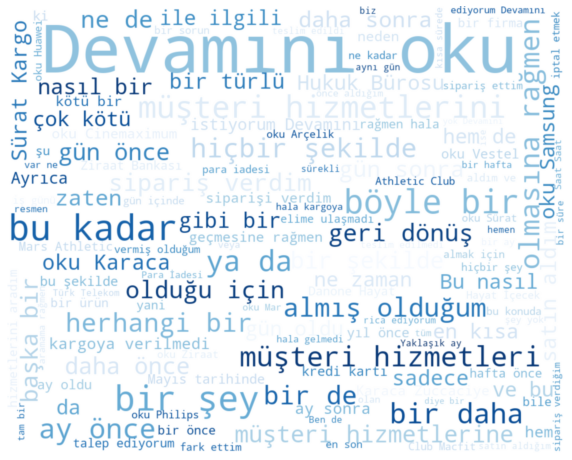

In [ ]:
# Let us take a look at the most frequently used word in the reviews
from wordcloud import WordCloud
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 183,  
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(data['text']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

* It means we should remove the "**Devamını oku** (Read More)" when preparing the train data.

# Most used words for each category

* Taking a sample from raw data only for the tfidf analysis.

In [ ]:
df2 = data.sample(100000, random_state=1).copy()

time: 61.8 ms (started: 2021-10-18 20:22:41 +00:00)


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1,1))

# We transform each review into a vector
df2_features = tfidf.fit_transform(df2.text).toarray()

df2_labels = df2.category_id

print("Each of the %d reviews is represented by %d features (TF-IDF score of unigrams and bigrams)" %(df2_features.shape))

In [ ]:
df2_features.shape

Chi-2 feature selection on a TF-IDF vector representation.

In [ ]:
# Finding the three most correlated terms with each of the categories
N = 20
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(df2_features, df2_labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(category))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

## Some necessary variables

In [ ]:
#limit the number of samples to be used in code runs
data_size= 427230

time: 1.47 ms (started: 2021-10-18 20:23:53 +00:00)


In [ ]:
vocab_size = 90000  # Only consider the top 90k words
maxlen = 50  # Max sequence size

time: 1.95 ms (started: 2021-10-18 20:23:54 +00:00)


In [ ]:
# save features and targets from the 'data' (raw data)
features, targets = data['text'], data['category_id']

time: 1.36 ms (started: 2021-10-18 20:23:54 +00:00)


# Spliting the data into train and test sets

* We should split the data before the preprocessing. 

* In order to avoid data leaks, some preprocesses should not be applied on the test set.

In [ ]:
train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        # random but same for all run, also accurancy depends on the
        # selection of data e.g. if we put 10 then accuracy will be 1.0
        # in this example
        random_state=23,
        # keep same proportion of 'target' in test and target data
        stratify=targets
    )

time: 277 ms (started: 2021-10-18 20:23:56 +00:00)


# Preprocessing the Data

In [ ]:
def custom_standardization(input_string): 
    first_input = tf.strings.regex_replace(input_string, "İ", "I")
    lowercased = tf.strings.lower(first_input, encoding='utf-8') #Turn to lower case
    stripped_html = tf.strings.regex_replace(lowercased, "<br />", " ") #Remove html line-break tags
    no_numbers = tf.strings.regex_replace(stripped_html, "\w*\d\w*"," ") #Remove numbers
    no_punctuation = tf.strings.regex_replace(no_numbers,'[%s]' % re.escape(string.punctuation),'') #Remove punctuations
    no_turkish_character = tf.strings.regex_replace(no_punctuation, "ç", "c") #Replace turkish characters
    no_turkish_character = tf.strings.regex_replace(no_turkish_character, "ğ", "g")
    no_turkish_character = tf.strings.regex_replace(no_turkish_character, "ı", "i")
    no_turkish_character = tf.strings.regex_replace(no_turkish_character, "ö", "o")
    no_turkish_character = tf.strings.regex_replace(no_turkish_character, "ş", "s")
    no_turkish_character = tf.strings.regex_replace(no_turkish_character, "ü", "u")
    no_read_more = tf.strings.regex_replace(no_turkish_character, "...devamini oku", " ") #Remove "Read More"
    return no_read_more

time: 28.2 ms (started: 2021-10-18 20:23:59 +00:00)


In [ ]:
output = custom_standardization('Pijamalı İlginç Otobüs Çıkıp Öldü Gözleri')
print(output)

tf.Tensor(b'pijamali ilginc otobus cikip oldu gozleri', shape=(), dtype=string)
time: 5.71 s (started: 2021-10-18 20:24:00 +00:00)


In [ ]:
# Create a vectorization layer and adapt it to the text
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size - 1,
    output_mode="int",
    output_sequence_length=maxlen,
)

time: 86 ms (started: 2021-10-18 20:24:06 +00:00)


In [ ]:
vectorize_layer.adapt(train_features)
vocab = vectorize_layer.get_vocabulary() 

time: 1min 23s (started: 2021-10-18 20:24:06 +00:00)


In [ ]:
print("vocab has the ", len(vocab)," entries")
print("vocab has the following first 10 entries")
for word in range(10):
  print(word, " represents the word: ", vocab[word])

vocab has the  89999  entries
vocab has the following first 10 entries
0  represents the word:  
1  represents the word:  [UNK]
2  represents the word:  bir
3  represents the word:  ve
4  represents the word:  bu
5  represents the word:  icin
6  represents the word:  de
7  represents the word:  da
8  represents the word:  ama
9  represents the word:  ne
time: 4.74 ms (started: 2021-10-18 20:25:29 +00:00)


# Saving Dictionary and Reusing - Shape problem

In [ ]:
# Vector for word "bu"
print(vectorize_layer("bu"))

tf.Tensor(
[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(50,), dtype=int64)
time: 152 ms (started: 2021-10-18 20:25:29 +00:00)


In [ ]:
# Vector for word "bu güzel gün"
print(vectorize_layer("bu güzel gün"))

tf.Tensor(
[  4 396  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int64)
time: 24.8 ms (started: 2021-10-18 20:25:29 +00:00)


In [ ]:
# Pickle the config and weights
pickle.dump({'config': vectorize_layer.get_config(),
             'weights': vectorize_layer.get_weights()}
            , open("tv_layer.pkl", "wb"))

# Later you can unpickle and use 
# `config` to create object and 
# `weights` to load the trained weights. 


time: 777 ms (started: 2021-09-27 09:07:59 +00:00)


In [ ]:
from_disk = pickle.load(open("tv_layer.pkl", "rb"))
new_vectorize_layer = TextVectorization.from_config(from_disk['config'])
# You have to call `adapt` with some dummy data (BUG in Keras)
new_vectorize_layer.adapt(tf.data.Dataset.from_tensor_slices(["xyz"]))
new_vectorize_layer.set_weights(from_disk['weights'])

time: 154 ms (started: 2021-09-27 09:08:00 +00:00)


In [ ]:
# Vector for word "bu"
print(new_vectorize_layer("bu"))

tf.Tensor([4], shape=(1,), dtype=int64)
time: 18.3 ms (started: 2021-09-27 09:08:01 +00:00)


In [ ]:
# Vector for word "bu güzel gün"
print(new_vectorize_layer("bu güzel gün"))

tf.Tensor([  4 401  11], shape=(3,), dtype=int64)
time: 16.6 ms (started: 2021-09-27 09:08:03 +00:00)


In [ ]:
# Vector for word "bu güzel gün"
print(new_vectorize_layer("bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün bu güzel gün"))

tf.Tensor(
[  4 401  11   4 401  11   4 401  11   4 401  11   4 401  11   4 401  11
   4 401  11   4 401  11   4 401  11   4 401  11   4 401  11   4 401  11
   4 401  11   4 401  11   4 401  11   4 401  11   4 401  11   4 401  11
   4 401  11   4 401  11   4 401  11   4 401  11   4 401  11   4 401  11], shape=(72,), dtype=int64)
time: 16.2 ms (started: 2021-09-27 09:12:07 +00:00)


# Model

In [ ]:
def causal_attention_mask(batch_size, n_dest, n_src, dtype):
    """
    Mask the upper half of the dot product matrix in self attention.
    This prevents flow of information from future tokens to current token.
    1's in the lower triangle, counting from the lower right corner.
    """
    i = tf.range(n_dest)[:, None]
    j = tf.range(n_src)
    m = i >= j - n_src + n_dest
    mask = tf.cast(m, dtype)
    mask = tf.reshape(mask, [1, n_dest, n_src])
    mult = tf.concat(
        [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)], 0
    )
    return tf.tile(mask, mult)


class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__()
        self.embed_dim=embed_dim
        self.num_heads = num_heads
        self.ff_dim =ff_dim
        self.att = layers.MultiHeadAttention(num_heads, embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        seq_len = input_shape[1]
        # for masked-self attention add the mask:
        # causal_mask = causal_attention_mask(batch_size, seq_len, seq_len, tf.bool)
        # attention_output = self.att(inputs, inputs,attention_mask=causal_mask)
        
        attention_output = self.att(inputs, inputs) 
        
        attention_output = self.dropout1(attention_output)
        out1 = self.layernorm1(inputs + attention_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
    
    # https://newbedev.com/saving-keras-models-with-custom-layers
    def get_config(self):
        config = super(TransformerBlock, self).get_config()
        config.update({
            'att': self.att,
            'ffn': self.ffn,
            'layernorm1': self.layernorm1,
            'layernorm2':self.layernorm2,
            'dropout1':self.dropout1,
            'dropout2':self.dropout2,
            'embed_dim': self.embed_dim,
            'num_heads':self.num_heads,
            'ff_dim':self.ff_dim 

        })
        return config
        #tf.keras.models.save_model(model, 'model.h5')
        #new_model = tf.keras.models.load_model('model.h5', custom_objects={'CustomLayer': CustomLayer})


time: 73.1 ms (started: 2021-10-18 20:29:35 +00:00)


In [ ]:
class TokenPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size,  embed_dim, **kwargs):
        super(TokenPositionEmbedding, self).__init__()
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, X):
        maxlen = tf.shape(X)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        X = self.token_emb(X)
        return X + positions 
        
    # https://newbedev.com/saving-keras-models-with-custom-layers
    def get_config(self):
        config = super(TokenPositionEmbedding, self).get_config()
        config.update({
            'token_emb': self.token_emb,
            'pos_emb': self.pos_emb,
            'maxlen': self.maxlen,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim
        })
        return config
        #tf.keras.models.save_model(model, 'model.h5')
        #new_model = tf.keras.models.load_model('model.h5', custom_objects={'CustomLayer': CustomLayer})
        

time: 26.4 ms (started: 2021-10-18 20:29:37 +00:00)


In [ ]:
embed_dim = 256  # Embedding size for each token
num_heads = 2  # Number of attention heads
feed_forward_dim = 256  # Hidden layer size in feed forward network inside transformer


def create_model():
    inputs_tokens = layers.Input(shape=(maxlen,), dtype=tf.int32)
    embedding_layer = TokenPositionEmbedding(maxlen, vocab_size, embed_dim)
    x = embedding_layer(inputs_tokens)
    transformer_block1 = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    transformer_block2 = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    x = transformer_block1(x)
    x = transformer_block2(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(number_of_categories)(x)
    model = keras.Model(inputs=inputs_tokens, outputs=outputs)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)  
    
    return model
my_model=create_model()

time: 800 ms (started: 2021-10-18 20:29:38 +00:00)


In [ ]:
my_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
token_position_embedding (To (None, 50, 256)           23052800  
_________________________________________________________________
transformer_block (Transform (None, 50, 256)           658688    
_________________________________________________________________
transformer_block_1 (Transfo (None, 50, 256)           658688    
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                409632    
Total params: 24,779,808
Trainable params: 24,779,808
Non-trainable params: 0
_________________________________________________

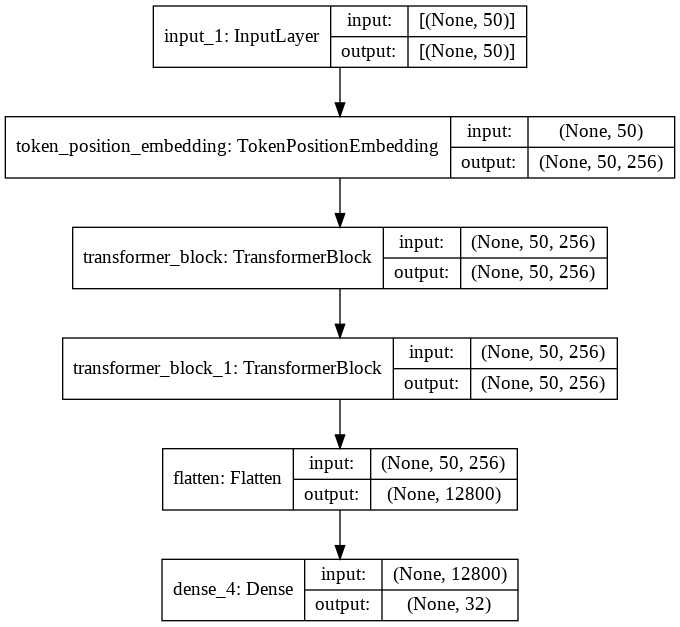

time: 404 ms (started: 2021-10-18 20:29:41 +00:00)


In [ ]:
tf.keras.utils.plot_model(my_model,show_shapes=True)

In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/models
%pwd

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/models'
/content/gdrive/My Drive/Kaggle


'/content/gdrive/My Drive/Kaggle'

time: 11.8 ms (started: 2021-10-18 20:29:42 +00:00)


In [ ]:
checkpoint_filepath = './checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False)

time: 1.44 ms (started: 2021-10-18 20:29:43 +00:00)


In [ ]:
X,y = train_features,train_targets

balanced_accuracy_scores = []
matthews_corrcoef_scores = []
f1_scores = []
conf_matrix_list_of_arrays = []

# prepare cross validation
n=5
seed=1
k_fold = KFold(n_splits=n, random_state=seed, shuffle=True)

for train_index, test_index in k_fold.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  X_train_dtm = vectorize_layer(X_train)
  X_test_dtm = vectorize_layer(X_test)
  history = my_model.fit(X_train_dtm, y_train, verbose=1, epochs=1, callbacks=[model_checkpoint_callback])
  y_pred_class = my_model.predict(X_test_dtm)

  y_pred_class = np.argmax(y_pred_class,axis=1)
  
  conf_matrix = confusion_matrix(y_test, y_pred_class)
  conf_matrix_list_of_arrays.append(conf_matrix)
  
  balanced_accuracy_scores.append(balanced_accuracy_score(y_test, y_pred_class))
  matthews_corrcoef_scores.append(matthews_corrcoef(y_test, y_pred_class))
  f1_scores.append(f1_score(y_test, y_pred_class, average='weighted'))

8545/8545 [==============================] - 442s 51ms/step - loss: 0.4181 - sparse_categorical_accuracy: 0.9056


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


8545/8545 [==============================] - 411s 48ms/step - loss: 0.1319 - sparse_categorical_accuracy: 0.9663


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


8545/8545 [==============================] - 405s 47ms/step - loss: 0.0792 - sparse_categorical_accuracy: 0.9792


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


8545/8545 [==============================] - 403s 47ms/step - loss: 0.0505 - sparse_categorical_accuracy: 0.9866


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


8545/8545 [==============================] - 404s 47ms/step - loss: 0.0344 - sparse_categorical_accuracy: 0.9908


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


time: 40min 52s (started: 2021-10-18 20:29:49 +00:00)


Average sparse_categorical_accuracy: 0.9643

In [ ]:
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print('Mean of conf_matrix: ', mean_of_conf_matrix_arrays)

Mean of conf_matrix:  [[2.0634e+03 1.6000e+00 7.8000e+00 ... 5.0000e+00 4.0000e-01 8.0000e-01]
 [3.0000e+00 1.9208e+03 8.0000e-01 ... 2.4000e+00 0.0000e+00 0.0000e+00]
 [1.2000e+00 0.0000e+00 2.1388e+03 ... 1.6000e+00 2.0000e-01 2.0000e-01]
 ...
 [4.0000e-01 4.0000e-01 1.2000e+00 ... 2.0694e+03 2.0000e-01 0.0000e+00]
 [2.0000e-01 0.0000e+00 2.0000e-01 ... 1.4000e+00 2.1082e+03 5.6000e+00]
 [2.0000e-01 0.0000e+00 2.0000e-01 ... 4.0000e-01 4.4000e+00 2.2172e+03]]
time: 6.62 ms (started: 2021-10-18 21:10:43 +00:00)


In [ ]:
conf_mat = mean_of_conf_matrix_arrays.astype(int)

time: 1.13 ms (started: 2021-10-18 21:10:43 +00:00)


In [ ]:
category_id_df = data[['category', 'category_id']].drop_duplicates()

time: 39.2 ms (started: 2021-10-18 21:12:12 +00:00)


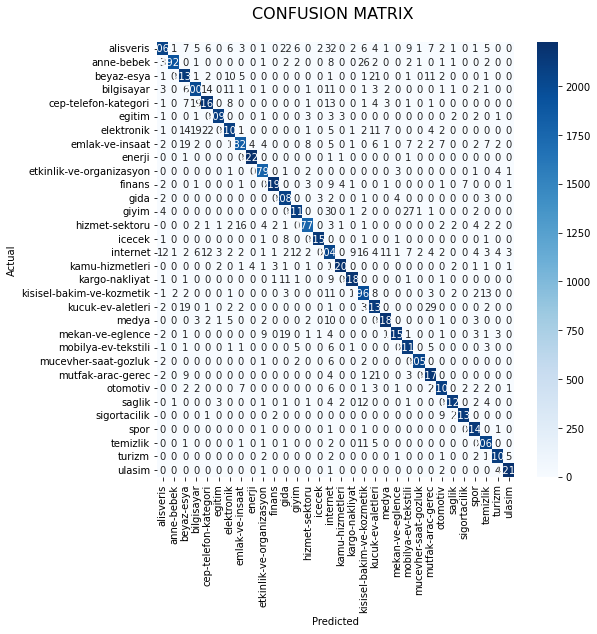

time: 9.72 s (started: 2021-10-18 21:12:13 +00:00)


In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.category.values, 
            yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX \n", size=16);

# Metrics

In [ ]:
balanced_accuracy_scores = np.array(balanced_accuracy_scores)
print('Mean of balanced_accuracy_scores: ', np.mean(balanced_accuracy_scores, axis=0))

Mean of balanced_accuracy_scores:  0.9769549599981706
time: 1.63 ms (started: 2021-10-18 21:12:26 +00:00)


In [ ]:
matthews_corrcoef_scores = np.array(matthews_corrcoef_scores)
print('Mean of matthews_corrcoef_scores: ', np.mean(matthews_corrcoef_scores, axis=0))

Mean of matthews_corrcoef_scores:  0.976322044613503
time: 1.78 ms (started: 2021-10-18 21:12:27 +00:00)


In [ ]:
f1_scores = np.array(f1_scores)
print('Mean of f1_scores: ', np.mean(f1_scores, axis=0))

Mean of f1_scores:  0.9771237992848306
time: 2.23 ms (started: 2021-10-18 21:12:28 +00:00)


**Test the Model**

In [ ]:
test_features_vc = vectorize_layer(test_features)
y_pred_test = my_model.predict(test_features_vc)
y_pred_test = np.argmax(y_pred_test,axis=1)
 
balanced_accuracy_score_test = balanced_accuracy_score(test_targets, y_pred_test)
print('balanced_accuracy_score_test :',balanced_accuracy_score_test)
matthews_corrcoef_score_test = matthews_corrcoef(test_targets, y_pred_test)
print('matthews_corrcoef_score_test :',matthews_corrcoef_score_test)
f1_score_test = f1_score(test_targets, y_pred_test, average='weighted')
print('f1_score_test :',f1_score_test)


balanced_accuracy_score_test : 0.9520353064741285
matthews_corrcoef_score_test : 0.9507118901914144
f1_score_test : 0.9524388892809142
time: 47.1 s (started: 2021-10-18 21:12:35 +00:00)


In [ ]:
new_review = "Telefon çok kötü çıktı. Hiç memnun kalmadım."
predictions=my_model.predict(vectorize_layer([new_review]))
for pred in predictions:
  print(id_to_category[np.argmax(pred)])

cep-telefon-kategori
time: 70.9 ms (started: 2021-10-18 21:13:22 +00:00)


In [ ]:
examples = [
  "Bu telefonun şarjı kısa sürüyor.",
  "Spor salonu aidatını geri iade etmediler",
  "Uçak biletini iptal etmek için çok uğraştım.",
  "Bebek bezi çok pahalı",
  "İndikten sonra havayolu çalışanları ile kavga ettik",
]
predictions=my_model.predict(vectorize_layer(examples))
for pred in predictions:
  print(id_to_category[np.argmax(pred)])

cep-telefon-kategori
spor
ulasim
anne-bebek
ulasim
time: 200 ms (started: 2021-10-18 21:15:18 +00:00)


# Save the Model

In [ ]:
tf.keras.models.save_model(my_model, 'MultiClassTextClassifier')

INFO:tensorflow:Assets written to: MultiClassTextClassifier/assets


INFO:tensorflow:Assets written to: MultiClassTextClassifier/assets


time: 13.9 s (started: 2021-10-18 21:15:25 +00:00)
